In [1]:
import numpy as np
import tensorflow as tf
from keras import datasets, layers, models, Input, Model
import matplotlib.pyplot as plt

# 21BCE2067 Kshitiz Bhargava

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add a channel dimension
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# 21BCE2067 Kshitiz Bhargava

In [3]:
# Build the VGGNet model
def build_vggnet(input_shape, num_classes):
    model = models.Sequential()
    
    # VGG Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # VGG Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # VGG Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # VGG Block 4
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Flatten the layers
    model.add(layers.Flatten())
    # Fully connected layer
    model.add(layers.Dense(512, activation='relu'))
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# 21BCE2067 Kshitiz Bhargava

In [4]:
# Set input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 10

# Build and compile the model
model = build_vggnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 21BCE2067 Kshitiz Bhargava

/Users/kshitiz/GitHub/Programming/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Print the model summary
model.summary()

# 21BCE2067 Kshitiz Bhargava

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,952,010 (18.89 MB)

 Trainable params: 4,952,010 (18.89 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# 21BCE2067 Kshitiz Bhargava

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 181s 192ms/step - accuracy: 0.7035 - loss: 0.7651 - val_accuracy: 0.8930 - val_loss: 0.3010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 180s 192ms/step - accuracy: 0.8946 - loss: 0.2831 - val_accuracy: 0.9019 - val_loss: 0.2823
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 179s 190ms/step - accuracy: 0.9148 - loss: 0.2278 - val_accuracy: 0.9138 - val_loss: 0.2379
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 180s 192ms/step - accuracy: 0.9278 - loss: 0.1998 - val_accuracy: 0.9215 - val_loss: 0.2207
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 179s 191ms/step - accuracy: 0.9397 - loss: 0.1669 - val_accuracy: 0.9209 - val_loss: 0.2197
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 179s 191ms/step - accuracy: 0.9435 - loss: 0.1526 - val_accuracy: 0.9265 - val_loss: 0.2242
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 178s 190ms/step - accuracy: 0.9536 - loss: 0.1238 - val_accuracy: 0.9209 - val_loss: 0.2643
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 178s 190ms/step - accuracy: 0.9583 -

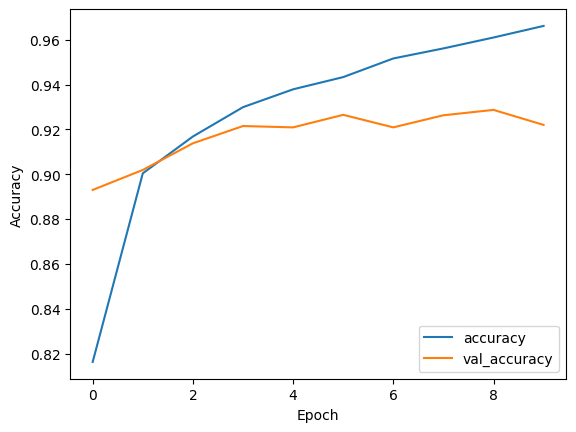

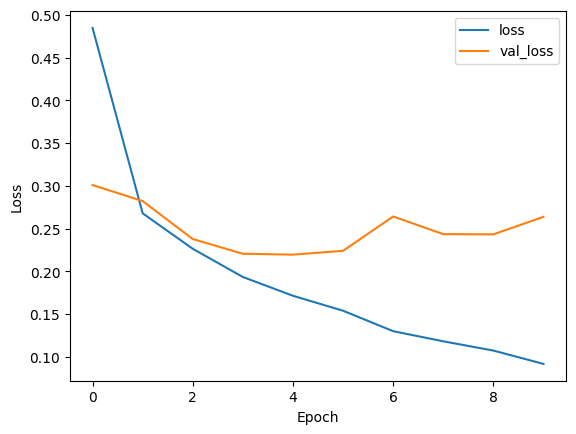

In [7]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 21BCE2067 Kshitiz Bhargava

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# 21BCE2067 Kshitiz Bhargava

313/313 - 8s - 24ms/step - accuracy: 0.9220 - loss: 0.2638
Test accuracy: 0.921999990940094
